In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
import re
from ipykernel import kernelapp as app
import seaborn as sns

In [31]:
plt.style.use('fivethirtyeight')

In [32]:
## Read csv and save as DF
nba_stats = pd.read_csv('./Data/mvp_votings.csv').drop(columns='Unnamed: 0')
pd.set_option('display.max_columns', None)

In [33]:
nba_stats.head(10)

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,0.756098,28.0,454.0,690,0.658,82,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,0.756098,20.0,423.0,690,0.613,82,39.5,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,0.658537,8.0,286.0,690,0.414,80,37.2,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,0.487805,8.0,180.0,690,0.261,80,40.6,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,0.634146,1.0,83.0,690,0.120,82,33.7,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182
5,15.2,0.1,5.0,22.0,0.583,23.3,5.9,1980-81,Marques Johnson,0.731707,1.0,73.0,690,0.106,76,33.4,20.3,6.8,4.6,1.5,0.5,0.552,0.000,0.706,11.2,0.211
6,14.2,0.0,4.8,25.2,0.579,27.1,5.0,1980-81,Robert Parish,0.756098,0.0,53.0,690,0.077,82,28.0,18.9,9.5,1.8,1.0,2.6,0.545,0.000,0.710,10.9,0.228
7,15.4,0.6,6.3,17.0,0.516,24.6,2.0,1980-81,Dennis Johnson,0.695122,0.0,50.0,690,0.072,79,33.1,18.8,4.6,3.7,1.7,0.8,0.436,0.216,0.820,8.4,0.154
8,9.6,0.1,5.2,14.3,0.582,17.5,-1.3,1980-81,Tiny Archibald,0.756098,0.0,32.0,690,0.046,80,35.3,13.8,2.2,7.7,0.9,0.2,0.499,0.000,0.816,6.9,0.118
9,18.5,0.2,4.1,18.0,0.556,24.5,0.8,1980-81,Jamaal Wilkes,0.658537,0.0,19.0,690,0.028,81,37.4,22.6,5.4,2.9,1.5,0.4,0.526,0.077,0.758,8.5,0.135


In [34]:
nba_stats.dtypes

fga            float64
fg3a           float64
fta            float64
per            float64
ts_pct         float64
usg_pct        float64
bpm            float64
season          object
player          object
win_pct        float64
votes_first    float64
points_won     float64
points_max       int64
award_share    float64
g                int64
mp_per_g       float64
pts_per_g      float64
trb_per_g      float64
ast_per_g      float64
stl_per_g      float64
blk_per_g      float64
fg_pct         float64
fg3_pct        float64
ft_pct         float64
ws             float64
ws_per_48      float64
dtype: object

In [35]:
nba_stats["points_max"] = nba_stats["points_max"].astype(float)

In [36]:
nba_stats.dtypes

fga            float64
fg3a           float64
fta            float64
per            float64
ts_pct         float64
usg_pct        float64
bpm            float64
season          object
player          object
win_pct        float64
votes_first    float64
points_won     float64
points_max     float64
award_share    float64
g                int64
mp_per_g       float64
pts_per_g      float64
trb_per_g      float64
ast_per_g      float64
stl_per_g      float64
blk_per_g      float64
fg_pct         float64
fg3_pct        float64
ft_pct         float64
ws             float64
ws_per_48      float64
dtype: object

In [37]:
nba_stats.isnull().sum()

fga            0
fg3a           0
fta            0
per            0
ts_pct         0
usg_pct        0
bpm            0
season         0
player         0
win_pct        0
votes_first    0
points_won     0
points_max     0
award_share    0
g              0
mp_per_g       0
pts_per_g      0
trb_per_g      0
ast_per_g      0
stl_per_g      0
blk_per_g      0
fg_pct         0
fg3_pct        0
ft_pct         0
ws             0
ws_per_48      0
dtype: int64

In [38]:
#set whole column to 'No'
nba_stats['Mvp?']='No'
nba_stats.head(10)

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,Mvp?
0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,0.756098,28.0,454.0,690.0,0.658,82,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,No
1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,0.756098,20.0,423.0,690.0,0.613,82,39.5,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,No
2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,0.658537,8.0,286.0,690.0,0.414,80,37.2,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,No
3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,0.487805,8.0,180.0,690.0,0.261,80,40.6,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202,No
4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,0.634146,1.0,83.0,690.0,0.120,82,33.7,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182,No
5,15.2,0.1,5.0,22.0,0.583,23.3,5.9,1980-81,Marques Johnson,0.731707,1.0,73.0,690.0,0.106,76,33.4,20.3,6.8,4.6,1.5,0.5,0.552,0.000,0.706,11.2,0.211,No
6,14.2,0.0,4.8,25.2,0.579,27.1,5.0,1980-81,Robert Parish,0.756098,0.0,53.0,690.0,0.077,82,28.0,18.9,9.5,1.8,1.0,2.6,0.545,0.000,0.710,10.9,0.228,No
7,15.4,0.6,6.3,17.0,0.516,24.6,2.0,1980-81,Dennis Johnson,0.695122,0.0,50.0,690.0,0.072,79,33.1,18.8,4.6,3.7,1.7,0.8,0.436,0.216,0.820,8.4,0.154,No
8,9.6,0.1,5.2,14.3,0.582,17.5,-1.3,1980-81,Tiny Archibald,0.756098,0.0,32.0,690.0,0.046,80,35.3,13.8,2.2,7.7,0.9,0.2,0.499,0.000,0.816,6.9,0.118,No
9,18.5,0.2,4.1,18.0,0.556,24.5,0.8,1980-81,Jamaal Wilkes,0.658537,0.0,19.0,690.0,0.028,81,37.4,22.6,5.4,2.9,1.5,0.4,0.526,0.077,0.758,8.5,0.135,No


In [39]:
# then just change to 'Yes' for mvp winners
for season in nba_stats['season'].value_counts().index:
    
    #isolate data from that season
    season_df=nba_stats[nba_stats['season'].isin([season])]
    
    #get the index of player with most mvp points
    index=[season_df['points_won'].idxmax()]
    
    #change player's 'Mvp?' entry to yes
    nba_stats['Mvp?'][index]='Yes'

C:\Users\delil\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [40]:
nba_stats.head(10)

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,Mvp?
0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,0.756098,28.0,454.0,690.0,0.658,82,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,Yes
1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,0.756098,20.0,423.0,690.0,0.613,82,39.5,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,No
2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,0.658537,8.0,286.0,690.0,0.414,80,37.2,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,No
3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,0.487805,8.0,180.0,690.0,0.261,80,40.6,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202,No
4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,0.634146,1.0,83.0,690.0,0.120,82,33.7,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182,No
5,15.2,0.1,5.0,22.0,0.583,23.3,5.9,1980-81,Marques Johnson,0.731707,1.0,73.0,690.0,0.106,76,33.4,20.3,6.8,4.6,1.5,0.5,0.552,0.000,0.706,11.2,0.211,No
6,14.2,0.0,4.8,25.2,0.579,27.1,5.0,1980-81,Robert Parish,0.756098,0.0,53.0,690.0,0.077,82,28.0,18.9,9.5,1.8,1.0,2.6,0.545,0.000,0.710,10.9,0.228,No
7,15.4,0.6,6.3,17.0,0.516,24.6,2.0,1980-81,Dennis Johnson,0.695122,0.0,50.0,690.0,0.072,79,33.1,18.8,4.6,3.7,1.7,0.8,0.436,0.216,0.820,8.4,0.154,No
8,9.6,0.1,5.2,14.3,0.582,17.5,-1.3,1980-81,Tiny Archibald,0.756098,0.0,32.0,690.0,0.046,80,35.3,13.8,2.2,7.7,0.9,0.2,0.499,0.000,0.816,6.9,0.118,No
9,18.5,0.2,4.1,18.0,0.556,24.5,0.8,1980-81,Jamaal Wilkes,0.658537,0.0,19.0,690.0,0.028,81,37.4,22.6,5.4,2.9,1.5,0.4,0.526,0.077,0.758,8.5,0.135,No


In [41]:
nba_stats.to_csv("./Data/nba_stats_mvp.csv")

In [42]:
## Read new csv and save as DF
mvp_stats = pd.read_csv('./Data/nba_stats_mvp.csv').drop(columns='Unnamed: 0')
pd.set_option('display.max_columns', None)
mvp_stats

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,Mvp?
0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,0.756098,28.0,454.0,690.0,0.658,82,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,Yes
1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,0.756098,20.0,423.0,690.0,0.613,82,39.5,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,No
2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,0.658537,8.0,286.0,690.0,0.414,80,37.2,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,No
3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,0.487805,8.0,180.0,690.0,0.261,80,40.6,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202,No
4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,0.634146,1.0,83.0,690.0,0.120,82,33.7,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,18.0,1.2,5.3,25.0,0.570,29.1,3.3,2017-18,LaMarcus Aldridge,0.573171,0.0,6.0,1010.0,0.006,75,33.5,23.1,8.5,2.0,0.6,1.2,0.510,0.293,0.837,10.9,0.209,No
633,15.6,3.4,7.2,23.7,0.590,24.9,5.0,2017-18,Jimmy Butler,0.573171,0.0,5.0,1010.0,0.005,59,36.7,22.2,5.3,4.9,2.0,0.4,0.474,0.350,0.854,8.9,0.198,No
634,16.9,9.8,5.9,28.2,0.675,31.0,8.6,2017-18,Stephen Curry,0.707317,0.0,5.0,1010.0,0.005,51,32.0,26.4,5.1,6.1,1.6,0.2,0.495,0.423,0.921,9.1,0.267,No
635,16.8,3.4,7.4,22.9,0.573,33.4,2.6,2017-18,Joel Embiid,0.634146,0.0,4.0,1010.0,0.004,63,30.3,22.9,11.0,3.2,0.6,1.8,0.483,0.308,0.769,6.2,0.155,No


In [43]:
mvp_stats['season'].value_counts()

1980-81    31
1981-82    25
1982-83    23
1984-85    23
1998-99    21
1990-91    20
1996-97    20
1988-89    19
1997-98    19
2001-02    18
1985-86    18
2006-07    17
2000-01    17
1995-96    17
1991-92    17
1993-94    17
2007-08    17
1987-88    17
1986-87    17
2013-14    17
2003-04    16
2012-13    16
2004-05    16
1999-00    16
1994-95    15
2009-10    15
2011-12    15
1983-84    15
1992-93    14
1989-90    14
2002-03    13
2010-11    13
2017-18    13
2008-09    12
2014-15    12
2005-06    11
2016-17    11
2015-16    10
Name: season, dtype: int64

In [44]:
mvp_stats['season'].value_counts()

1980-81    31
1981-82    25
1982-83    23
1984-85    23
1998-99    21
1990-91    20
1996-97    20
1988-89    19
1997-98    19
2001-02    18
1985-86    18
2006-07    17
2000-01    17
1995-96    17
1991-92    17
1993-94    17
2007-08    17
1987-88    17
1986-87    17
2013-14    17
2003-04    16
2012-13    16
2004-05    16
1999-00    16
1994-95    15
2009-10    15
2011-12    15
1983-84    15
1992-93    14
1989-90    14
2002-03    13
2010-11    13
2017-18    13
2008-09    12
2014-15    12
2005-06    11
2016-17    11
2015-16    10
Name: season, dtype: int64

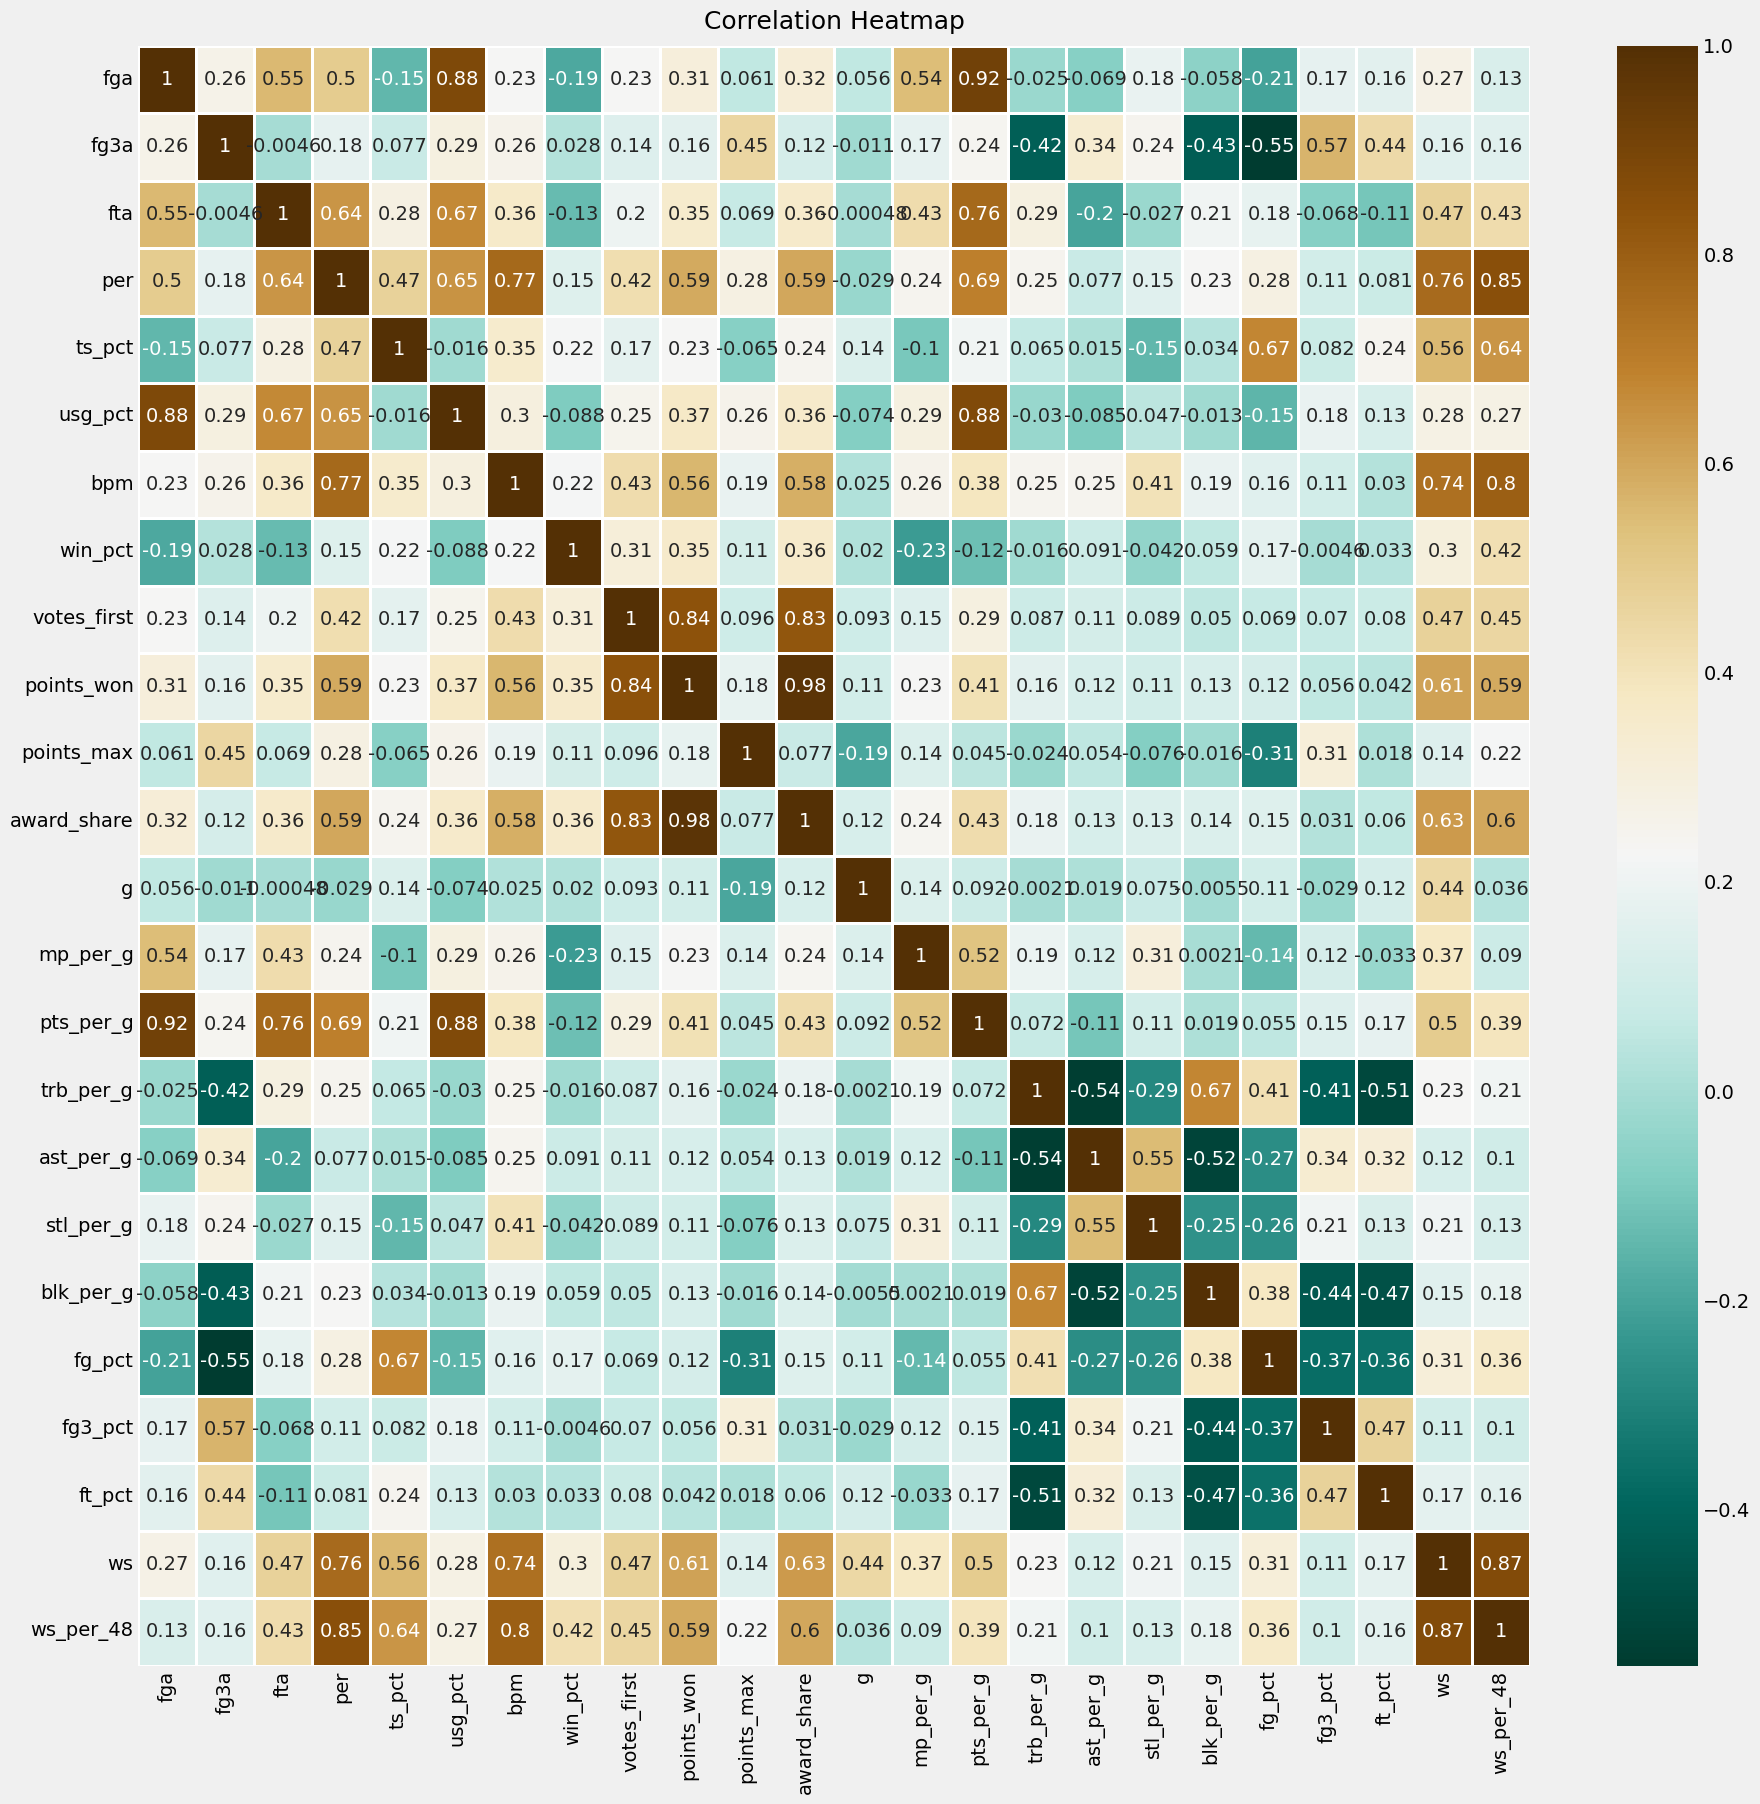

In [45]:
# Create a correlation heatmap to visualize which variables are linearly related
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(mvp_stats.corr(),annot=True, linewidth=1, cmap='BrBG_r')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('./images/heatmap.png', dpi=300, bbox_inches='tight')

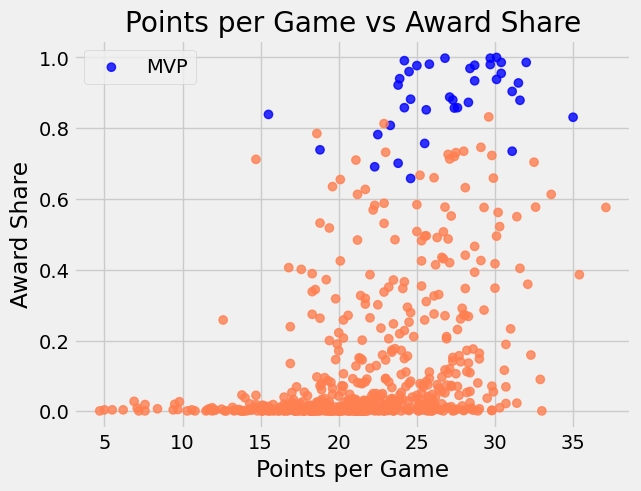

In [56]:
# Scatter plot to compare points per game vs award share

colors = ['blue' if mvp_stats["Mvp?"][i]=="Yes" else "coral" for i in range(len(mvp_stats))]

plt.scatter(mvp_stats['pts_per_g'], mvp_stats['award_share'], c=colors, linewidths=1, alpha=.8)

plt.xlabel('Points per Game')
plt.ylabel('Award Share')
plt.title("Points per Game vs Award Share")

plt.legend(['MVP', 'Not MVP'], loc='upper left')


plt.savefig("./images/pts_per_g_vs_award_share.png", dpi=300, bbox_inches='tight')
plt.show()

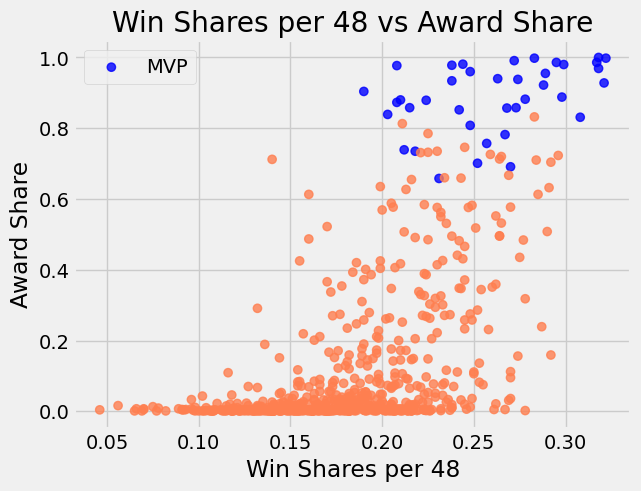

In [57]:
# Scatter plot to compare win shares per 48 vs award share

colors = ['blue' if mvp_stats["Mvp?"][i]=="Yes" else "coral" for i in range(len(mvp_stats))]

plt.scatter(mvp_stats['ws_per_48'], mvp_stats['award_share'], c=colors, linewidths=1, alpha=.8)

plt.xlabel('Win Shares per 48')
plt.ylabel('Award Share')
plt.title("Win Shares per 48 vs Award Share")
plt.legend(['MVP', 'Not MVP'], loc='upper left')

plt.savefig("./images/win_shares_per_48_vs_award_share.png", dpi=300, bbox_inches='tight')
plt.show()

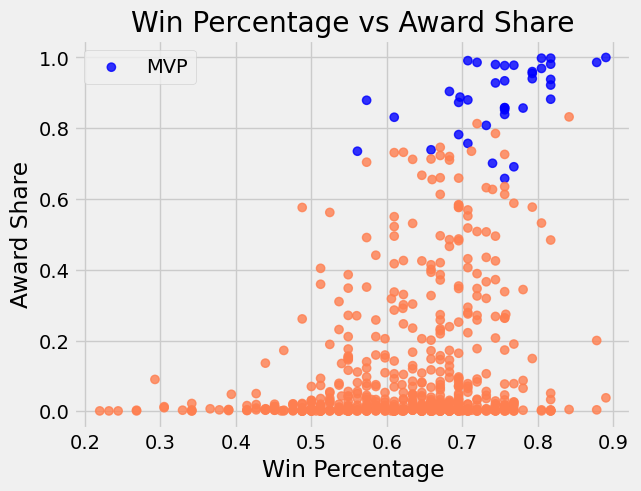

In [58]:
# Scatter plot to compare win percentage vs award share

colors = ['blue' if mvp_stats["Mvp?"][i]=="Yes" else "coral" for i in range(len(mvp_stats))]

plt.scatter(mvp_stats['win_pct'], mvp_stats['award_share'], c=colors, linewidths=1, alpha=.8)

plt.xlabel('Win Percentage')
plt.ylabel('Award Share')
plt.title("Win Percentage vs Award Share")
plt.legend(['MVP', 'Not MVP'], loc='upper left')

plt.savefig("./images/win_percentage_vs_award_share.png", dpi=300, bbox_inches='tight')
plt.show()

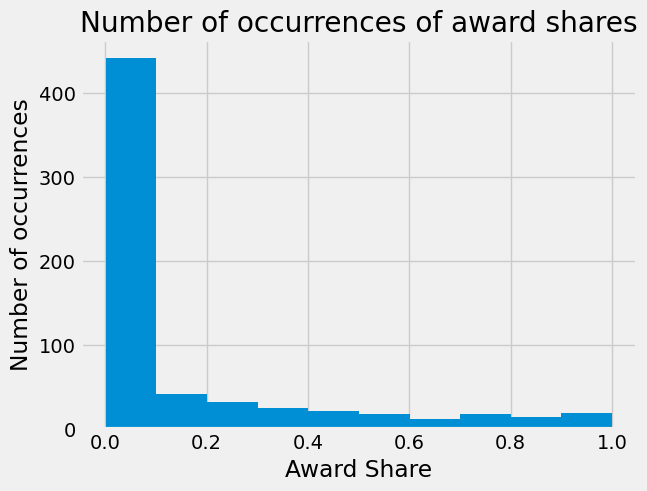

In [61]:
# Create histogram of award share values
plt.hist(mvp_stats['award_share'])

plt.xlabel("Award Share")
plt.ylabel("Number of occurrences")
plt.title("Number of occurrences of award shares")

plt.savefig("./images/award_share_occurrences.png", dpi=300, bbox_inches='tight')
plt.show()